In [2]:
import os, sys

import pandas as pd
import numpy as np
import pickle
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"]="3" #specify GPU 
from tensorflow import keras as K
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2022-03-22 21:49:11.144322: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


#### Define parameters for this cross-validation run

In [3]:
hyperparameter_file = 'hyperparameters' # textfile which contains the hyperparameters of the model
data_file = 'data_test_fold0_tanh.p.gz' # pickle file which contains the data (produced with normalize.ipynb)

#### Define smoothing functions for early stopping parameter

In [4]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

#### Load parameters defining the model

In [5]:
exec(open(hyperparameter_file).read()) 

#### Load data 
tr = 60% of data for training during hyperparameter selection <br>
val = 20% of data for validation during hyperparameter selection

train = tr + val = 80% of data for training during final testing <br>
test = remaining left out 20% of data for unbiased testing 

splitting and normalization was done with normalize.ipynb

In [6]:
file = gzip.open(data_file, 'rb')
X_tr, X_val, X_train, X_test, y_tr, y_val, y_train, y_test = pickle.load(file)
file.close()

#### run set

In [7]:
config = tf.compat.v1.ConfigProto(
         allow_soft_placement=True,
         #gpu_options = tf.GPUOptions(allow_growth=True)
        # gpu_options = tf.compat.v1.GPUOptions(allow_growth = True)
        )

config.gpu_options.allow_growth = True

In [8]:

#set_session(tf.compat.v1.Session()(config=config))

from tensorflow.compat.v1 import InteractiveSession
session = InteractiveSession(config=config)



2022-03-22 21:49:55.522719: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-22 21:49:55.581487: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-22 21:49:55.605438: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-22 21:49:55.617823: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Olympias
2022-03-22 21:49:55.617852: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Olympias
2022-03-22 21:49:55.628254: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported 

In [8]:
model = Sequential()
metrics=[tf.keras.metrics.MeanSquaredError(), 
         tf.keras.metrics.RootMeanSquaredError(),
         tf.keras.metrics.MeanAbsoluteError()]
for i in range(len(layers)):
    if i==0:
        model.add(Dense(layers[i], input_shape=(X_tr.shape[1],), activation=act_func, 
                        kernel_initializer='he_normal'))
        model.add(Dropout(float(input_dropout)))
    elif i==len(layers)-1:
        model.add(Dense(layers[i], activation='linear', kernel_initializer="he_normal"))
    else:
        model.add(Dense(layers[i], activation=act_func, kernel_initializer="he_normal"))
        model.add(Dropout(float(dropout)))
    model.compile(loss='mean_squared_error', metrics= metrics, optimizer=K.optimizers.SGD(lr=float(eta), momentum=0.5))

2022-03-20 14:11:12.489184: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 289511888 exceeds 10% of free system memory.
2022-03-20 14:11:12.840712: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 289511888 exceeds 10% of free system memory.
2022-03-20 14:11:12.920522: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 289511888 exceeds 10% of free system memory.
/home/nidhi/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Train model

In [9]:
print(X_tr.shape)
print(y_tr.shape)

(27768, 8846)
(27768,)


In [12]:
hist = model.fit(X_tr, y_tr, epochs=15, shuffle=True, batch_size=64, validation_data=(X_val, y_val))
val_loss = hist.history['val_loss']
model.save("model_50_eopochs.h5")
#model.reset_states()

Epoch 1/15
434/434 [==============================] - 125s 288ms/step - loss: 436.6067 - mean_squared_error: 436.6067 - root_mean_squared_error: 20.8951 - mean_absolute_error: 13.0226 - val_loss: 361.0805 - val_mean_squared_error: 361.0805 - val_root_mean_squared_error: 19.0021 - val_mean_absolute_error: 12.7548
Epoch 2/15
434/434 [==============================] - 126s 291ms/step - loss: 424.9230 - mean_squared_error: 424.9230 - root_mean_squared_error: 20.6137 - mean_absolute_error: 12.8399 - val_loss: 354.4756 - val_mean_squared_error: 354.4756 - val_root_mean_squared_error: 18.8275 - val_mean_absolute_error: 12.6764
Epoch 3/15
434/434 [==============================] - 124s 285ms/step - loss: 415.4151 - mean_squared_error: 415.4151 - root_mean_squared_error: 20.3817 - mean_absolute_error: 12.7222 - val_loss: 350.0184 - val_mean_squared_error: 350.0184 - val_root_mean_squared_error: 18.7088 - val_mean_absolute_error: 12.5916
Epoch 4/15
434/434 [==============================] - 123s

In [16]:
model.save("model_15_epochs.h5")
model_15epochs = load_model("model_15_epochs.h5")
predictions_15epochs = model_15epochs.predict(X_test)


In [ ]:
predictions_15epochs

In [11]:
hist.history

{'loss': [539.1558837890625, 481.4039306640625],
 'mean_squared_error': [539.1558837890625, 481.4039306640625],
 'root_mean_squared_error': [23.219730377197266, 21.940919876098633],
 'mean_absolute_error': [14.708244323730469, 13.697532653808594],
 'val_loss': [418.8004455566406, 384.8361511230469],
 'val_mean_squared_error': [418.8004455566406, 384.8361511230469],
 'val_root_mean_squared_error': [20.464614868164062, 19.61724090576172],
 'val_mean_absolute_error': [13.840609550476074, 13.217065811157227]}

Evaluate model on test data

In [12]:
print("Regression metrics from the model")
results = model.evaluate(X_test, y_test, batch_size=128)
print(results)
print("Mean squared Error=", results[1])
print("Root Mean squared Error=", results[2])
print("Mean Absolute Error=", results[3])


Regression metrics from the model
72/72 [==============================] - 7s 101ms/step - loss: 378.5557 - mean_squared_error: 378.5557 - root_mean_squared_error: 19.4565 - mean_absolute_error: 12.9566
[378.5556640625, 378.5556640625, 19.456506729125977, 12.956592559814453]
Mean squared Error= 378.5556640625
Root Mean squared Error= 19.456506729125977
Mean Absolute Error= 12.956592559814453


Synergy Score Prediction

In [13]:
print("Synergy Score Prediction")
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

print(predictions)

Synergy Score Prediction
predictions shape: (9108, 1)
[[4.5292225]
 [5.321245 ]
 [5.1032667]
 ...
 [4.0974307]
 [5.7467527]
 [3.683684 ]]


Classification metrics for model

In [14]:
#generate classification labels.
#Classification threshold = 30 as used in paper.
classification_df = pd.DataFrame(y_test, columns= ["y_test"])

classification_df.loc[classification_df.y_test > 30, "y_label"] = 1
classification_df.loc[classification_df.y_test < 30, "y_label"] = 0

#add predictions to classification_df
classification_df["predictions"] = predictions

classification_df.loc[classification_df.predictions > 30, "predicted_label"] = 1
classification_df.loc[classification_df.predictions < 30, "predicted_label"] = 0

classification_df.head()


,y_test,y_label,predictions,predicted_label
0,4.331695,0.0,4.529222,0.0
1,-8.161129,0.0,5.321245,0.0
2,-5.415934,0.0,5.103267,0.0
3,-7.747474,0.0,1.266781,0.0
4,-14.347426,0.0,1.752109,0.0


In [15]:
correct_preds = classification_df.index[classification_df.y_label == classification_df.predicted_label].tolist()
accuracy = 100 * len(correct_preds)/classification_df.shape[0]
balanced_accuracy = 100 * balanced_accuracy_score(np.array(classification_df.y_label), np.array(classification_df.predicted_label))
print("accuracy = {}%".format(accuracy))
print("balanced accuracy = {0}%".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion_matrix(np.array(classification_df.y_label), np.array(classification_df.predicted_label)))



accuracy = 94.1919191919192%
balanced accuracy = 50.09433962264151%
Confusion Matrix:
[[8578    0]
 [ 529    1]]


Accuracy per epoch

In [9]:
model = Sequential()
metrics=[tf.keras.metrics.MeanSquaredError(), 
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.MeanAbsoluteError()]
for i in range(len(layers)):
    if i==0:
        model.add(Dense(layers[i], input_shape=(X_tr.shape[1],), activation=act_func, 
        kernel_initializer='he_normal'))
        
        model.add(Dropout(float(input_dropout)))
        
    elif i==len(layers)-1:
        model.add(Dense(layers[i], activation='linear', kernel_initializer="he_normal"))
    
    else:
        model.add(Dense(layers[i], activation=act_func, kernel_initializer="he_normal"))
        model.add(Dropout(float(dropout)))
        
    model.compile(loss='mean_squared_error', metrics= metrics, optimizer=K.optimizers.SGD(lr=float(eta), momentum=0.5))
model.save("model.h5") 

index = 0
columns = ["MSE", "RMSE", "MAE", "acc", "balanced_acc"]
metrics_df = pd.DataFrame(columns = columns)

for epoch in range(1,50):
    
    model = load_model('model.h5')
    hist = model.fit(X_train, y_train, epochs=1, shuffle=True, batch_size=64, validation_data=(X_test, y_test))

    print("Regression metrics from the model")
    results = model.evaluate(X_test, y_test, batch_size=128)
    predictions2 = model.predict(X_test)
    classification_df = pd.DataFrame(y_test, columns= ["y_test"])

    classification_df.loc[classification_df.y_test > 30, "y_label"] = 1
    classification_df.loc[classification_df.y_test < 30, "y_label"] = 0

    #add predictions to classification_df
    classification_df["predictions"] = predictions2
    classification_df.loc[classification_df.predictions > 30, "predicted_label"] = 1
    classification_df.loc[classification_df.predictions < 30, "predicted_label"] = 0

    correct_preds = classification_df.index[classification_df.y_label == classification_df.predicted_label].tolist()
    accuracy = 100 * len(correct_preds)/classification_df.shape[0]
    balanced_accuracy = 100 * balanced_accuracy_score(np.array(classification_df.y_label), np.array(classification_df.predicted_label))

    #metrics per epoch
    metrics_df.at[index, "MSE"] = results[1]
    metrics_df.at[index, "RMSE"] = results[2]
    metrics_df.at[index, "MAE"] = results[3]
    metrics_df.at[index, "acc"] = accuracy
    metrics_df.at[index, "balanced_acc"] = balanced_accuracy

    index +=1
    print(metrics_df)
    model.save("model.h5")
    print("Saved model to disk")




        

2022-03-22 21:49:56.369160: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 289511888 exceeds 10% of free system memory.
2022-03-22 21:49:56.720320: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 289511888 exceeds 10% of free system memory.
2022-03-22 21:49:56.900168: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 289511888 exceeds 10% of free system memory.
/home/nidhi/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2022-03-22 21:49:58.352629: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 289511888 exceeds 10% of free system memory.
2022-03-22 21:49:58.630181: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 289511888 exceeds 10% of free system memory.
2022-03-22 21:50:03.079443: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] No

579/579 [==============================] - 154s 263ms/step - loss: 506.7362 - mean_squared_error: 506.7362 - root_mean_squared_error: 22.5108 - mean_absolute_error: 14.4443 - val_loss: 400.8413 - val_mean_squared_error: 400.8413 - val_root_mean_squared_error: 20.0210 - val_mean_absolute_error: 13.3899
Regression metrics from the model
72/72 [==============================] - 7s 98ms/step - loss: 400.8414 - mean_squared_error: 400.8414 - root_mean_squared_error: 20.0210 - mean_absolute_error: 13.3899
       MSE    RMSE      MAE      acc balanced_acc
0  400.841  20.021  13.3899  94.1809           50
Saved model to disk
183/579 [========>.....................] - ETA: 1:43 - loss: 473.5054 - mean_squared_error: 473.5054 - root_mean_squared_error: 21.7602 - mean_absolute_error: 13.8231

KeyboardInterrupt: 

Saving results to disk for plotting.

In [22]:
# #save predictions to disk for plotting results.
# predictions_df = pd.DataFrame(predictions)
# predictions_df.to_csv("/home/nidhi/Documents/freelancing/DeepSynergy/data/Results/predictions.csv")

In [ ]:
predictions2_df

,0
0,3.928714
1,4.185056
2,3.786518
3,0.477290
4,-1.461741
...,...
9103,-1.225690
9104,0.568435
9105,0.568435
9106,3.253036


In [ ]:
#save results of model training version 2 (WITH ACCURACY METRICS PER EPOCH)
predictions2_df = pd.DataFrame(predictions2)
predictions2_df.to_csv("predictions_per_epoch_acc_50_epochs.csv")

In [ ]:
#save metrics_df 
metrics_df.to_csv("metrics_per_epoch_50epochs.csv")

#### smooth validation loss for early stopping parameter determination

In [19]:
average_over = 2 #was 15 earlier. We only ran 2 epochs. So, threw error.
mov_av = moving_average(np.array(val_loss), average_over)
print(mov_av)
smooth_val_loss = np.pad(mov_av, int(average_over/2), mode='edge')
epo = np.argmin(smooth_val_loss)


[401.81829834]


#### determine model performance for methods comparison 

In [20]:
hist = model.fit(X_train, y_train, epochs=2, shuffle=True, batch_size=64, validation_data=(X_test, y_test))
test_loss = hist.history['val_loss']

Epoch 1/2
 63/579 [==>...........................] - ETA: 2:12 - loss: 406.9713 - mean_squared_error: 406.9713 - root_mean_squared_error: 20.1735 - mean_absolute_error: 13.0009

KeyboardInterrupt: 

#### plot performance 

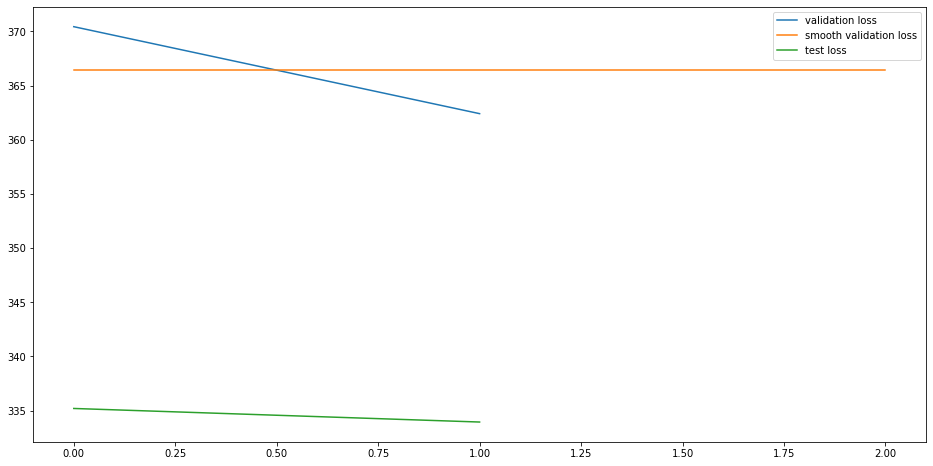

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(val_loss, label='validation loss')
ax.plot(smooth_val_loss, label='smooth validation loss')
ax.plot(test_loss, label='test loss')
ax.legend()
plt.show()